---
 Computational Statistics | Summer 2020, M.Sc. in Economics, University of Bonn | [Sona Verdiyeva](https://github.com/s6soverd)
 
---

# On the shrinkage method - LASSO 

   This paper focuses on the theoretical properties of LASSO - an $l_1$-norm regularization method, and drawing upon these theoretical properties, I have set up simulations that elucidate either visually or with the help of tables how LASSO acts in certain specified settings, and with which features it differs from OLS or Ridge - both being also linear regression methods. The structure of the paper is outlined in the  **"Table of Contents"** below. The first section focuses briefly on the famous "Bias and Variance" tradeoff in Machine Learning, which builds the context on why I chose to focus on LASSO for this project paper. The second section explains why OLS fails in estimating parameters in high-dimensional data settings, what is high-dimensional and why LASSO is helpful in such settings are all accounted for in this section, as well. The proceeding Section sheds light on the fact that LASSO doesn't have a closed-form solution, but there are very few simplifed cases, where a LASSO estimation can be derived. The underlying subsection 3.1. shows in simulatory setting what happens when we shrink OLS parameters by very small random values. Questions like *"Are we getting better predictions? Or do the variance of such models get improved? etc."* are addressed in this set-up. 

   The Section 4, in passing, talks about the major difference and commonalities between Ridge and LASSO, before we utilize simulation set-ups that use also Ridge as a benchmark. In the subsection 4.1., with a simple linear regression model I show visually why Ridge only assymptotically gets close to zero, but LASSO can indeed set the parameter, in question, to zero. In the Section 5, it is shown when the some values of true $\beta$ vector are zero, on average, which of the linear regression methods are good at predicting them. 

   The rest of this project paper is comprised of 2 simulations that unravel the differences between Ridge and LASSO. Questions like *"How the parameters of the covariates with differential variances are dealt by LASSO and Ridge?, "What about the parameters of correlated covariates?"* are all adressed in these two sections.


---
## Table of Contents

* [1. Bias and Variance tradeoff in Machine Learning](#bias)
* [2. What is meant by "high-dimensional" and why OLS fails in estimating the parameters in such problems](#high-dim)
* [3. LASSO doesn't have a closed form solution, or does it?](#solution)
  * [3.1. Simulation Set-up 1: Shrinking OLS parameters: Are we getting better predictions?](#prediction)
* [4. How different is LASSO from Ridge? ](#ridge)
  * [4.1. Simulation Set-up 2: Simple linear regression visualization with Lasso and Ridge, as $\lambda$ increases, what happens?](#lambda)
* [5. Simulation Set-up 3: On average, when estimating the true zero-parameters accurately, which one performs better: Lasso, Ridge or OLS?](#zero)
* [6. Simulation Set-up 4: How differently LASSO and Ridge handles covariates with differential variances](#covariate)
* [7. Simulation Set-up 5: And what about correlated covariates? How differently, LASSO and Ridge behaves:](#corr)
* [8. Conclusion](#conclusion)
* [9. References](#references)
---
   

---
# 1. Bias and Variance tradeoff in Machine Learning <a class="anchor" id="bias"></a>
---

The inability of a machine learning method to capture the true relationship between the dependent and independent variables is called **bias**. Given two methods, we can compare how much bias each has, by calculating their sum of squared residuals. In other words; $\sum_{i = 1}^n (y_{i} - \hat{y})^2$. The formulae is applied for the training set, to which we have fit the model. 

Using the fitted model, we can calculate predictions for the testing set. And the difference in sum of squared residuals for the training and test set is called **variance**. Thus, a model that overfits the training set is going to have a very low bias, but this low-bias will come at the high cost of variance; meaning less precise predictions for the testing, or rather, new dataset. 

Having higher variance means that the model is highly variable with respect to how well it is going to make predictions on the new datasets. It might sometimes do well, sometimes do terrible. A model with lower variance and high bias; on the other hand, will consistently give good predictions for different datasets due to having lower variance, but perhaps not great predictions, as it has a higher bias. 

In machine learning, the best algorithm has low bias, meaning, the method accurately models the true relationship, and has low variance, meaning, across different datasets, it consistently produces good predictions. And there are three commonly used Machine learning(also known as ML) methods that try to achieve that; namely:

 * Regularization
 * Boosting
 * Bagging
 
And in what follows, I will solely focus on regularization out of the three above, and more specifically on LASSO(also known as Least Absolute Shrinkage and Selection Operator).

---
# 2. What is meant by "high-dimensional" and why OLS fails in estimating the parameters in such problems <a class="anchor" id="high-dim"></a>
---

The term "high-dimensional" refers to the case where we have more unknown parameters than the data available; mathematically, $p\gg n$. 

OLS is helpless in estimating the parameters when the given number of unknown parameters are much higher than the available data points. To be able to estimate the parameters, the n should be at least p + 1. 

For $p > n$, the linear model, as we know $Y = X*\beta^0 + \epsilon$ has no unique solution, and the linear model is under-determined. As a matter of fact, the linear model or the above equation has infinitely many solutions. 

To illustrate my point, I will use a very simple linear model, the one with the intercept (or rather $\beta_0$) and the slope (or rather $\beta_1$). And we have, for simplicity, have just one data point available. Given these, it is apparent that our unknowns(p + 1 = 2) are more than the data points (n = 1). As said before, n should be at least p + 1, meaning, 2, in order to calculate the $\beta_0$ and $\beta_1$. The model that I suggest falls down to calculating:
$Y = \beta_0 + \beta_1 * X_1$. 
From high-school algebra, we know that here $\beta_1$ corresponds to the slope of the line, namely, *m*; and the $\beta_0$ corresponds with the y-intercept, namely *b*. So in a way we can write the above model as:
$y = b + m*x$. 

To calculate *m*,  we need to have 2 data points. However, here, we are given only 1 data point. 

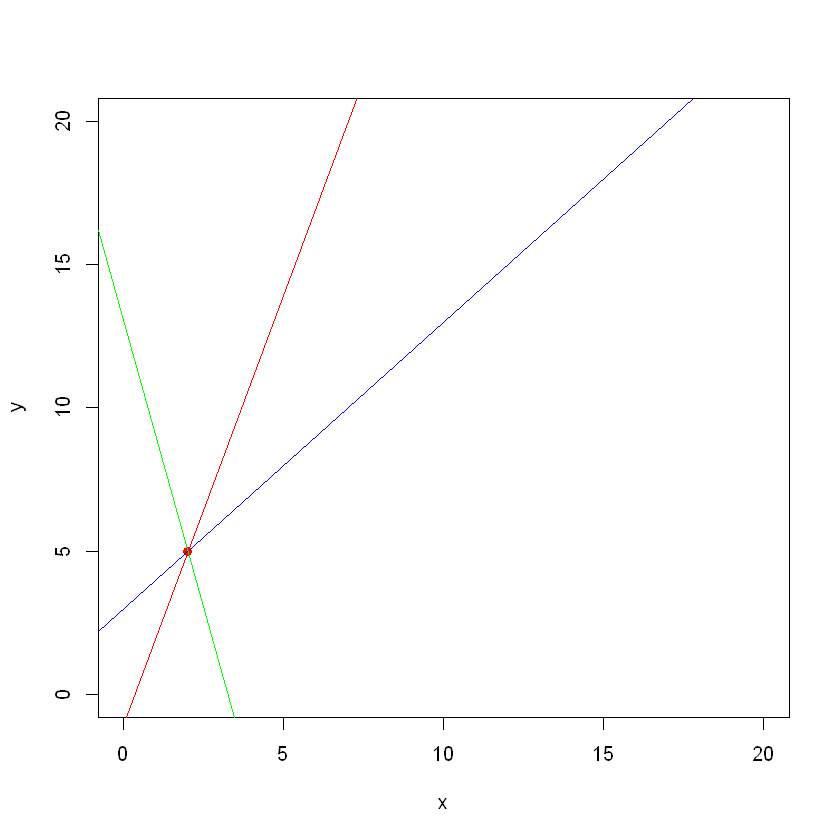

In [1]:
plot(x = 2, y = 5, xlim = c(0, 20), ylim = c(0, 20), type = "p", col = "red", pch = 16, xlab = "x", ylab = "y")
abline(3, 1, col = "blue")
abline(-1, 3, col = "red")
abline(13, -4, col = "green")

As it is apparent from the above plot, from the one data point, one can draw infinitely many different lines, all having the sum of squared residuals equal to zero; thus, there is no one unique $\beta_0$ and $\beta_1$ which minimizes the sum of sqaured residuals. Given this, we have infinitely many solutions; or more pessimistically, OLS doesn't have a solution for this rather simplified "high-dimensional" problem.

Thus, without any constraints or additional information, it is impossible to find a solution to the above problem. If we are given a constraint, out of many solutions, we can pick the one that satisfies that constraint, hence being the solution to the above problem. 

In this regard, regularization methods come at handy. Before delving into how LASSO is commonly sought after in problems of high-dimensional nature (Belloni et al., 2014), I will discuss two assumptions that build the intutition behind LASSO.
 > Sparsity assumption
 
 > Basis Pursuit Linear program

Sparsity assumption for an unknown vector means that  that vector has less number of non-zero elements; hence the name sparse. So the sparsity assumption for the true $\beta$ is a constraint that results in beta having less number of non-zero elements. One way of doing this is to use *$l_0$*-norm. For a quick brush-up, the *$l_0$*-norm, *$l_1$*-norm and *$l_2$*-norm are defined as:

---
$$\| \beta \|_0 = \sum_{j = 1}^{p} I(\beta_{j} \neq 0) \\[1pt]
\| \beta \|_1 = \sum_{j = 1}^{p} |\beta_{j}| \\[1pt]
\| \beta \|_2 = \sum_{j = 1}^{p} \beta_{j}^2 \\[1pt] 
$$

---





Our *$l_{0}$*-norm constrained optimization looks like this:

---
$$\underset{\beta \in \mathbb{R}}{\text{minimize}} \
\| \beta \|_0 \\
\text{subject to} \
 Y = X\beta \\
$$

The above constrained optimization problem is like a best subset selection. However, when our p is quite large, then we need to look at $\binom{p}{s}$ number of subsets, where $s \leq n$, which is computationally infeasible. 

*Basis Pursuit Linear Program* uses *$l_1$*-norm to solve the equation:

---
$$\underset{\beta \in \mathbb{R}}{\text{minimize}} \
\| \beta \|_1 \\
\text{subject to} \
 Y = X\beta \\
$$

---


Now, using a simplified example (Gauraha, 2018), we can show how under sparsity assumption, one can solve under-determined linear equation. Suppose we have the below equation:
$$ \begin{bmatrix}
       2\\[0.3em]
       2 \\[0.3em]
     \end{bmatrix} = \begin{bmatrix} 
                             2 & 1 & 0 \\[0.3em]
                             2 & 0 & 1 \\[0.3em]
                      \end{bmatrix}  \times   \begin{bmatrix} 
                                              \beta_1 \\[0.3em]
                                              \beta_2 \\[0.3em]
                                              \beta_3 \\[0.3em]
                                             \end{bmatrix}
$$
     

Let's assume that the $\beta$ has a sparse solution. To find the solution, we set certain components of the subset of $\beta$ to zero such that equation holds. Here are some solutions:
$$[\beta_1 = 1, \: \beta_2 = 0, \; \beta_3 = 0], \; \| \beta \|_0 = 1, \; \| \beta \|_1 = 1 \\
[\beta_1 = 0, \: \beta_2 = 2, \; \beta_3 = 2], \; \| \beta \|_0 = 2, \; \| \beta \|_1 = 4
$$

The solution with the least number of non-zero elements is $[\beta_1 = 1, \: \beta_2 = 0, \; \beta_3 = 0]$, since $\| \beta \|_0 = 1 < \| \beta \|_0 = 2$. And the solution of Basis Pursuit Linear Program is also the same for this particular equation; meaning $[\beta_1 = 1, \: \beta_2 = 0, \; \beta_3 = 0]$, since $\| \beta \|_1 = 1 < \| \beta \|_1 = 4$.

In the proceeding section, I will discuss how shrinkage of coeffiecients, whose intution we built throughout this section, helps in finding a solution to high-dimensional problems, and LASSO's central role in it.

---
# 3. LASSO doesn't have a closed form solution, or does it? <a class="anchor" id="solution"></a>
---

LASSO is a *$l_1$*-regularized regression method. It estimates the regression parameters by solving the below constrained optimization problem:

---
$$
\underset{\beta \in \mathbb{R}^{p}}{\text{minimize}} \
\frac{1}{n}\| Y - X\beta \|_2^2 \\
\text{subject to} \
\| \beta \|_1 \leq t
$$

---

where $t$ is a upper-bound over $l_1$-norm. It is obvious from the inequality that if our $t \geq \hat{\beta}^{OLS}$, then our LASSO estimate and OLS estimate are the same. Since OLS-estimated beta minimizes the sum of squared residuals and at the same time, satisfies the constraint as well. If our $t \leq \hat{\beta}^{OLS}$, then LASSO will shrink the coefficients towards zero, or even set some to zero. 

The Lagrange function corresponding to the above constrained regression optimization is given below. For a quick note, Langrangian  of an optimization problem is the sum of objective function and its weighted constraints.

---
$$\hat{\beta(\lambda)} = \underset{\beta \in \mathbb{R^{p}}}{\text{arg min}} \
\frac{1}{n}\| Y - X\beta \|_2^2 + \lambda\| \beta \|_1 \\
$$

---

where $\lambda \geq 0$ is a parameter that determines the intensity of shrinkage. Because the objective function above is not differentiable ($|x|$ has no derivative at 0, hence, not differentiable, same hold for $\| \beta \|_1 = | \beta |$), the LASSO has generally no closed form solution. However, in the case of single-variable model and orthonormal design matrix (basically, for each $i \neq j,  \: X_{i}^T X_{j} = 0$, meaning the variables are uncorrelated), a solution is derivable. 
In the paragraphs that follow, we will look at how to derive a LASSO solution for the single-variable case.

**Simple Linear Regression** 

Assume we have one predictor, $p = 1$, and also our predictor is standardized ($Y = X_1\beta_1 + \epsilon$). Then, the optimization problem is reduced down to finding the $\hat{\beta}^{LASSO}$ that is the solution to $\underset{\beta \in \mathbb{R}^{p}}{\text{minimize}} \
\frac{1}{n}\| Y - X_1\beta_1 \|_2^2 + \lambda| \beta_1 |$. Then, from the Stationarity Condition of the Kuhn-Tucker, sub-differential of the Lagrangian function at the $\hat{\beta}^{LASSO}$ should contain zero. 

Sub-gradients of a convex function $f$ at $x$ is called subdifferential of $f$ at $x$, and is denoted as $sign(x)$. Subdifferential of $f = |x|$ is equal to:
$$
sign(x) =
  \begin{cases}
    -1       & \quad \text{if } x < 0 \\
    [-1, 1]  & \quad \text{if } x = 0 \\
    1        & \quad \text{if } x > 0 \\
  \end{cases}
$$
  


By the same token, sub-differential of $|\beta_1|$ is equal to:
$$
sign(\beta_1) = 
   \begin{cases}
    -1       & \quad \text{if } \beta_1 < 0 \\
    [-1, 1]  & \quad \text{if } \beta_1 = 0 \\
    1        & \quad \text{if } \beta_1 > 0 \\
  \end{cases}
$$

Taking the sub-differential of the above Lagrangian:
$$
0 \in -\frac{2}{n}X_1^T(Y - X_1\hat{\beta_1}) + \lambda sign(\hat{\beta_1})
$$


**Note**:

Taking subdifferential of a differentiable function means taking its derivative.




$$-\frac{2}{n}X_1^T(Y - X_1\hat{\beta_1}) + \lambda sign(\hat{\beta_1}) = 0 \\
\frac{1}{n}X_1^T(Y - X_1\hat{\beta_1}) = \frac{\lambda}{2} sign(\hat{\beta_1})
$$
As our predictor is standardized, $\frac{1}{n}X_1^T X_1 = 1$

To show how:

---
$$
X_1^T = \Bigg(\frac{x_{1_1} - \frac{x_{1_1}+\dotsb+x_{1_n}}{n}}{\sqrt[2]{\frac{\sum_{i = 1}^{n} (x_{1_i} - \bar{x_1})^2}{n}}}  \cdots \frac{x_{1_n} - \frac{x_{1_1}+\dotsb+x_{1_n}}{n}}{\sqrt[2]{\frac{\sum_{i = 1}^{n} (x_{1_i} - \bar{x_1})^2}{n}}} \Bigg) \\
X_1 = \begin{pmatrix} 
         \frac{x_{1_1} - \frac{x_{1_1}+\dotsb+x_{1_n}}{n}}{\sqrt[2]{\frac{\sum_{i = 1}^{n} (x_{1_i} - \bar{x_1})^2}{n}}} \\
         \vdots \\
         \frac{x_{1_n} - \frac{x_{1_1}+\dotsb+x_{1_n}}{n}}{\sqrt[2]{\frac{\sum_{i = 1}^{n} (x_{1_i} - \bar{x_1})^2}{n}}} \\
       \end{pmatrix}        
$$
---



For each data point of the variable $X_1$ we deduct the mean and divide by the standard deviation of the variable $X_1$ (so as to standardize the $X_1$). 

Multiplying $X_1^T X_1$, we get:
$$ X_1^T X_1 = \frac{(x_{1_1} - \bar{x_1})^2 +\dotsb+(x_{1_n} - \bar{x_1})^2}{\sqrt[2]{\frac{\sum_{i = 1}^{n} (x_{1_i} - \bar{x_1})^2}{n}}} = \frac{\sum_{i = 1}^{n} (x_{1_i} - \bar{x_1})^2}{\sum_{i = 1}^{n} (x_{1_i} - \bar{x_1})^2} \times n = n
$$

Hence, $\frac{1}{n} X_1^T X_1 = 1$


Thus, $\frac{1}{n}X_1^T(Y - X_1\hat{\beta_1}) = \frac{\lambda}{2} sign(\hat{\beta_1})$ simplifies to:


$$
\hat{\beta_1} = \frac{1}{n}X_1^TY - \frac{\lambda}{2}sign(\hat{\beta_1}) \\
$$

From above we know that:

---
$$
sign(\hat{\beta_1}) = -1 \quad \text{if } \hat{\beta_1} < 0, \quad \text{which leads to } \frac{1}{n}X_1^TY - \frac{\lambda}{2}sign(\hat{\beta_1}) < 0   \implies \\
\frac{1}{n}X_1^TY - \frac{\lambda}{2} (-1) < 0 \implies \\
\frac{1}{n}X_1^TY < (-\frac{\lambda}{2})
$$

---

---
$$
sign(\hat{\beta_1}) = [-1, 1] \quad \text{if } \hat{\beta_1} = 0, \quad \text{which leads to } \frac{1}{n}X_1^TY - \frac{\lambda}{2} \times [-1, 1] = 0 \implies \\
\frac{1}{n}X_1^TY = \frac{\lambda}{2} \times [-1, 1] \implies \\
\frac{1}{n} \mid X_1^TY \mid \leq \frac{\lambda}{2} 
$$

---

---
$$
sign(\hat{\beta_1}) = 1\quad \text{if } \hat{\beta_1} > 0, \quad \text{which leads to } \frac{1}{n}X_1^TY - \frac{\lambda}{2}sign(\hat{\beta_1}) > 0   \implies \\
\frac{1}{n}X_1^TY - \frac{\lambda}{2} \times 1 > 0 \implies \\
\frac{1}{n}X_1^TY > \frac{\lambda}{2}
$$

---

Thus, 

---
$$
\hat{\beta_1}^{LASSO} = 
   \begin{cases}
     \frac{1}{n}X_1^TY + \frac{\lambda}{2}      & \quad \text{if } \frac{1}{n}X_1^TY < (-\frac{\lambda}{2})  \\
      0  & \quad \text{if } \frac{1}{n} \mid X_1^TY \mid \leq \frac{\lambda}{2} \\
      \frac{1}{n}X_1^TY - \frac{\lambda}{2}        & \quad \text{if } \frac{1}{n}X_1^TY > \frac{\lambda}{2} \\
  \end{cases}  
$$

---




As it is apparent, our $\hat{\beta_1}^{OLS} = \frac{1}{n}X_1^TY$. Thus, our $\hat{\beta_1}^{LASSO}$ is simply soft-thresholded by $\frac{\lambda}{2}$. For a quick brush-up, soft-thresholding refers to the shrinking of coefficients both positive and negative towards zero.

In the proceeding section, we will elucidate what happens to the Expected Prediction error, Bias and Variance of the models, if one shrinks OLS parameters.

---
## 3.1. Simulation Set-up 1: Shrinking OLS parameters: Are we getting better predictions? <a class="anchor" id="prediction"></a>
---

**Simulation Set-up:** 

The idea for this simulation is taken from (Gauraha, 2018). However, the simulation set-up is completely different, except the data generation part. The way I approached the setup of this simulation was based on the way Expected Prediction error, bias and variance of the model are derived in (James et al., 2013). 

The purpose of this simulation is to see whether we get better predictions if we shrink OLS parameters by certain amount.
1. Generate n = 100 data points with error vector $\epsilon_{n \times 1} \sim N(0, 1)$, $\quad p = 10, \quad \beta = \{1, 1, 1, 0.03, 0.03, 0.03, 0.05, 0, 0, 0
\}, \quad X \sim N_{p}(0, \Sigma)$ and $Y = X \beta + \epsilon.$ Here $\Sigma$ is a diagonal matrix, with values on the diagonal a sequence of values from between 1 and 2.
2. Do the above step 100 times and gather all training datasets.
3. For each set, fit OLS model.
4. Generate one test set from the same distributions specified in the step 1.

5. Calculate the fit of the testing set, based on, OLS parameters, including OLS parameters shrinked by $\{0.01, 0.025, 0.05, 0.1, 0.2, 0.3\}$ amounts

In [2]:
library(mvtnorm)

Warning message:
"package 'mvtnorm' was built under R version 3.6.3"

In [3]:
# Dataset Generating function, with the above specifications
gen_datasets = function(p, sample_size){
    eps <- rnorm(n = sample_size, mean = 0, sd = 1)
    beta.vec <- c(rep(1, 5), rep(0.03, 5), rep(0, 10))
    X <- rmvnorm(n= sample_size, mean=rep(0, p), sigma=diag(sample(1:2, p, replace = T), nrow = p, ncol = p))
    Y <- X %*% beta.vec + eps
    return(data.frame(Y, X))  
}


---
**Step 1:** Calculating Expected Prediction Error

---

Expected test MSE or prediction error refers to the average test MSE that we would obtain if we repeatedly estimated $f$ using a large number of training sets and tested each at $x_0$. The overall expected test MSE can be computed by averaging $E(y_0 - \hat{f(x_0)})^2$ over all possible values of $x_0$ in the test set.

---
**Expected Prediction Error: Bootstrapped Estimation**
---

One can estimate Expected prediction error with a lot of different methods. Here, to check the consistency of the results, I used two of such methods. One is based on **Bootsrapping**. To do this, a training set is chosen, and for each run, different rows of this set are sampled and is fitted by OLS. Given $\beta^{OLS}, \beta^{OLS} - 0.01, \beta^{OLS} - 0.025, \beta^{OLS} - 0.05, \ldots , \beta^{OLS} - 0.3$, the not-sampled part of the training set is predicted and sum of squared residuals for each one of such models is calculated. After the all the boots are run, the mean of the results for each one of the models is calculated.

In [5]:
epe.Boot <- function(B){
    data = gen_datasets(20, sample_size = 100)
    n <- nrow(data)
    PEboot1 <- vector("list", B)
    PEboot2 <- vector("list", B)
    PEboot3 <- vector("list", B)
    PEboot4 <- vector("list", B)
    PEboot5 <- vector("list", B)
    PEboot6 <- vector("list", B)
    PEboot7 <- vector("list", B)
    lambdas = c(0.01, 0.025, 0.05, 0.1, 0.2, 0.3)
    for(b in 1:B){
        i <- sample(n, n, replace = TRUE)
        beta.ols = solve(t(as.matrix(data[i, -1])) %*% as.matrix(data[i, -1])) %*% t(as.matrix(data[i, -1])) %*% as.matrix(data[i, 1])
        beta.shrinked = NULL
        for(l in 1:6){
            beta.shrinked = append(beta.shrinked, data.frame(beta.ols - lambdas[l]))
        }
        beta.shrinked_models = data.frame(beta.shrinked)
        colnames(beta.shrinked_models) = sprintf("OLS - %.3f", lambdas)
        PEboot1[[b]] = (as.matrix(data[-i, 1]) - (as.matrix(data[-i, -1]) %*% beta.ols))^2
        PEboot2[[b]] = (as.matrix(data[-i, 1]) - (as.matrix(data[-i, -1]) %*% beta.shrinked_models[, 1]))^2
        PEboot3[[b]] = (as.matrix(data[-i, 1]) - (as.matrix(data[-i, -1]) %*% beta.shrinked_models[, 2]))^2 
        PEboot4[[b]] = (as.matrix(data[-i, 1]) - (as.matrix(data[-i, -1]) %*% beta.shrinked_models[, 3]))^2
        PEboot5[[b]] = (as.matrix(data[-i, 1]) - (as.matrix(data[-i, -1]) %*% beta.shrinked_models[, 4]))^2
        PEboot6[[b]] = (as.matrix(data[-i, 1]) - (as.matrix(data[-i, -1]) %*% beta.shrinked_models[, 5]))^2
        PEboot7[[b]] = (as.matrix(data[-i, 1]) - (as.matrix(data[-i, -1]) %*% beta.shrinked_models[, 6]))^2   
    }
    epe = c("OLS" = mean(unlist(PEboot1)), "OLS - 0.01" = mean(unlist(PEboot2)), 
            "OLS - 0.025" = mean(unlist(PEboot3)), "OLS - 0.05" = mean(unlist(PEboot4)),
            "OLS - 0.1" = mean(unlist(PEboot5)), "OLS - 0.2" = mean(unlist(PEboot6)), "OLS - 0.3" = mean(unlist(PEboot7)))
    epe = data.frame(epe)
    colnames(epe) = "Expected Prediction Error: With Bootstrapping"
    return(epe) 
}

In [6]:
simulation.epe.bootstrap = epe.Boot(B = 1000)
simulation.epe.bootstrap

,Expected Prediction Error: With Bootstrapping
OLS,1.407152
OLS - 0.01,1.410394
OLS - 0.025,1.425944
OLS - 0.05,1.480364
OLS - 0.1,1.696085
OLS - 0.2,2.555059
OLS - 0.3,3.984072


---
**Expected Prediction Error**
---

Here, I utlized the definition of Expected Prediction Error as in (James et al., 2013). I sampled $k = 100$ different training sets and for each one of them I fit OLS. Given the estimated $\beta^{OLS}, \beta^{OLS} - 0.01, \beta^{OLS} - 0.025, \beta^{OLS} - 0.05, \ldots , \beta^{OLS} - 0.3$, the output vector of testing set is predicted. And expected prediction error is calculated as below:

---
$$
E(Y - \hat{f}(x))^2 = \frac{1}{k} \sum_{m = 1}^{k} (\frac{1}{n} \sum_{i = 1}^{n} (Y_{m, i} - \hat{Y}_{m, i})^2)
$$

---

In [9]:
# The test set (the same test set, we will use throughout)
test_set = gen_datasets(20, sample_size = 100)
test_setX = test_set[, -1]
test_setY = test_set[,  1]

In [10]:
# Expected Prediction Error
error = function(p, sample_size){
    # Creating a training set 
    train_set = gen_datasets(p = p, sample_size = sample_size)
    train_set$X = train_set[, -1]
    
    beta.ols = solve(t(as.matrix(train_set$X)) %*% as.matrix(train_set$X)) %*% t(as.matrix(train_set$X)) %*% as.matrix(train_set$Y)
    lambdas = c(0.01, 0.025, 0.05, 0.1, 0.2, 0.3)
    
    # Calculating Parameters, when OLS estimators get shrinked by  different amounts indicated in the list -lambdas
    beta.shrinked = NULL
    for(i in 1:6){
        beta.shrinked = append(beta.shrinked, data.frame(beta.ols - lambdas[i]))
    }
    beta.shrinked_models = data.frame(beta.shrinked)
    colnames(beta.shrinked_models) = sprintf("OLS - %.3f", lambdas) 
    
    # Sum of errors for different parameter columns
    # OLS
    ols.error = mean((as.matrix(test_setY) - (as.matrix(test_setX) %*% beta.ols))^2)
    # OLS - shrinkage amount
    ols.shrinked.errors = c()
    for(i in 1:6){
    
        ols.shrinked.errors[i] = mean((as.matrix(test_setY) - (as.matrix(test_setX) %*% beta.shrinked_models[,i]))^2)
    }
    ols.shrinked.errors.df = matrix(ols.shrinked.errors, nrow = 1, ncol = 6)
    colnames(ols.shrinked.errors.df) = sprintf("OLS - %.3f", lambdas)
    errors = cbind(ols.shrinked.errors.df, OLS = ols.error)
    return(errors)
}

In [11]:
library (plyr)
rep.errors = replicate(100, error(p = 20, sample_size = 100), simplify = FALSE)
df <- ldply(rep.errors, data.frame)
lambdas = c(0.01, 0.025, 0.05, 0.1, 0.2, 0.3)
expected.error = apply(df, 2, mean)
simulation.result = data.frame(expected.error)
rownames(simulation.result) = c(sprintf("OLS - %.3f", lambdas), "OLS")
colnames(simulation.result) = c("Expected Prediction Error")
simulation.result

,Expected Prediction Error
OLS - 0.010,1.513164
OLS - 0.025,1.534506
OLS - 0.050,1.606581
OLS - 0.100,1.887629
OLS - 0.200,2.997314
OLS - 0.300,4.837117
OLS,1.508063


From both method of estimating Expected Prediction Error, we see that as OLS parameters get shrinked equally by amounts as $\{0.01, 0.025, 0.05, 0.1, 0.2, 0.3\}$, the Expected Prediction Error gets increasing. 

---
**Step 2:** Calculating Bias and Variance of the Models

---

Expected Prediction Error is further decomposed into bias, variance and irreducible error:

---
$$
EPE(Y, \hat{f}(x)) = bias^2(\hat{f}(x)) + var(\hat{f}(x)) + \sigma^2 \implies \\
EPE(Y, \hat{f}(x)) = \underbrace{\left(f(x) - \mathbb{E} \left[ \hat{f}(x) \right]  \right)^2}_{\text{bias}^2 \left(\hat{f}(x) \right)} +
\underbrace{\mathbb{E} \left[ \left( \hat{f}(x) - \mathbb{E} \left[ \hat{f}(x) \right] \right)^2 \right]}_{\text{var} \left(\hat{f}(x) \right)} + \sigma^2
$$

---

---
**Bias**
---

Below, we will calculate the bias and variance of the models. Bias refers to the mean of the squared difference between the expected prediction of our model and the true value which we are trying to predict. So, in a way, bias tries to measures how far away overall, our models' predictions are from the true value. To calculate the bias, I used the above test_set, and gathered 100 different training sets, upon which as different as 7 models are trained. This implies, for each model, we had 1 test set, 100 training sets. Upon the trained models, I trained the one test set we had. That is to say, for each model, we had $100 \times 100$ predictions. 100 observations in the testing set, 100 modeled training set in each model. Afterwards, I calculated the average of the squared differences for each one of the 7 models, namely: 

---
$$bias \left(\hat{f}(x) \right) = \frac{1}{n}\sum_{i=1}^{n}(Y_{i} - mean(\hat{Y}_{i} + \dotsb + \hat{Y}_{i}))^2$$

---

In [291]:
equation = function(p, sample_size){
    #test_set = gen_datasets(10, sample_size = 100)
    #test_setX = test_set[, -1]
    #test_setY = test_set[,  1]
    # Creating a training set 
    train_set = gen_datasets(p = p, sample_size = sample_size)
    train_set$X = train_set[, -1]
    
    beta.ols = solve(t(as.matrix(train_set$X)) %*% as.matrix(train_set$X)) %*% t(as.matrix(train_set$X)) %*% as.matrix(train_set$Y)
    lambdas = c(0.01, 0.025, 0.05, 0.1, 0.2, 0.3)
    
    # Calculating Parameters, when OLS estimators get shrinked by  different amounts indicated in the list -lambdas
    beta.shrinked = NULL
    for(i in 1:6){
        beta.shrinked = append(beta.shrinked, data.frame(beta.ols - lambdas[i]))
    }
    beta.shrinked_models = data.frame(beta.shrinked)
    colnames(beta.shrinked_models) = sprintf("OLS - %.3f", lambdas) 
  
    equation.ols = as.matrix(test_setX) %*% beta.ols
    equation.ols.shrinked = NULL
    for(i in 1:6){
        
        equation.ols.shrinked = append(equation.ols.shrinked, data.frame(as.matrix(test_setX) %*% beta.shrinked_models[, i]))
    }
    equation.ols.shrinked_fits = data.frame(equation.ols.shrinked)
    colnames(equation.ols.shrinked_fits) = sprintf("OLS - %.3f", lambdas)
    yhats = cbind(equation.ols.shrinked_fits, OLS = equation.ols)
    return(yhats)
}

In [266]:
bias = function(p, sample_size){
    set.seed(1)
    equation = replicate(n = 100, equation(p = p, sample_size = sample_size), simplify = FALSE)
    total.sum = data.frame(matrix(nrow = 0, ncol = 7))
    for(l in 1:100){
        sum = c(rep(0, 7))
        for(i in 1:100){
            sum <- sum + equation[[i]][l,]
    }
        total.sum[nrow(total.sum) + 1, ] = sum
    }
    lambdas = c(0.01, 0.025, 0.05, 0.1, 0.2, 0.3)
    colnames(total.sum) = c(sprintf("OLS - %.3f", lambdas), "OLS")
    mean.total.sum = total.sum / 100
    
    bias = apply((test_setY - mean.total.sum)^2, 2, mean)
    return(bias)
}

In [267]:
simulated.bias = bias(p = 20, sample_size = 100)

In [268]:
simulation.result.bias = data.frame(simulated.bias)
colnames(simulation.result.bias) = c("Bias of the models")
simulation.result.bias

,Bias of the models
OLS - 0.010,0.9215981
OLS - 0.025,0.9373001
OLS - 0.050,0.9953652
OLS - 0.100,1.2311021
OLS - 0.200,2.1810025
OLS - 0.300,3.7688050
OLS,0.9191039


OLS estimation is the one that has the lowest bias, as it tries to minimize the sum of squared residuals, as we shrink OLS estimates, it is not suprising that the bias of the models increase.

---
**Variance**
---

The variance of the models is calculated in accordance with this formulation, here k refers to the number of training sets generated.

---
$$
Var(f(x)) = \frac{1}{k} \sum_{m = 1}^{k}(var(\hat{f}_{m}) \times \frac{p}{n})
$$

---

In [292]:
variance = function(p, sample_size){
    # Creating 100 different training sets, train them, use the parameters on our test set
    set.seed(1)
    equation = replicate(n = 100, equation(p = p, sample_size = sample_size), simplify = FALSE)
    # Amount by which we will shrink OLS parameters
    lambdas = c(0.01, 0.025, 0.05, 0.1, 0.2, 0.3)
    #A list of 100 dataframes, each corresponding to 100 predictions that we get for 1 observation from the testset, 
    # due to 100 generated trainset
    #c = as.data.frame(matrix(nrow = 100, ncol = 7))
    #colnames(c) <- c(sprintf("OLS - %.3f", lambdas), "OLS")
    #empty = replicate(n = 100, c, simplify = FALSE)

    #for(l in 1:100){
        #for(i in 1:100){
            #empty[[l]][i,] = equation[[i]][l,]
       # }
    #} 
    # Finding the variance of each of the 7 models
    variance = data.frame(matrix(nrow = 7, ncol = 100))
    
    rownames(variance) <- c(sprintf("OLS - %.3f", lambdas), "OLS")
    colnames(variance) <- c(sprintf("Variance %.1f", seq(1, 100)))
    for(i in 1:100){
        variance[,i] = apply(equation[[i]], 2, var)
    }
    var.mult = (variance * p) / sample_size
    ave.variance = apply(var.mult, 1, mean)  
    return(ave.variance)
    
}

In [293]:
simulated.variance = variance(p = 20, sample_size = 100)

In [294]:
simulation.result.variance = data.frame(simulated.variance)
colnames(simulation.result.variance) = c("Variance of the models")
simulation.result.variance

,Variance of the models
OLS - 0.010,1.923359
OLS - 0.025,1.863502
OLS - 0.050,1.769903
OLS - 0.100,1.605814
OLS - 0.200,1.370069
OLS - 0.300,1.257572
OLS,1.964804


It is also not suprising to see that variance of the shrinked models gets decreasing, as the shrinked models are not as overfit as OLS model.

---
# 4.  How different is LASSO from Ridge? <a class="anchor" id="ridge"></a>
---


The main difference between LASSO and Ridge is the difference in the addition of penalty. While LASSO uses $l_1$-norm penalty, Ridge uses $l_2$-norm penalty. The primary reason why these penalty terms are added is so that the model is not overfit to the training data set. Ridge regression cost function looks like:

---
$$
\frac{1}{n} \sum_{i = 1}^{n} (y_{i} - \hat{y}_{i})^2 + \lambda \| \beta \|_2 \rightarrow \\ 
\frac{1}{n} \sum_{i = 1}^{n} (y_{i} - \hat{y}_{i})^2 + \lambda \sum_{j = 1}^{p} \beta_{j}^2 \\[1pt] 
\text{In matrix form;     }  
(Y - X \beta)^T (Y - X \beta) + \lambda \beta^T \beta
$$

---

One can derive Ridge solution using either 'closed-form solution' approach or Gradient Descent approach. Gradient of ridge regression cost function is:

**Closed Form Solution**

---
$$\bigtriangledown [(Y - X \beta)^T (Y - X \beta) + \lambda \beta^T \beta] = \bigtriangledown [(Y - X \beta)^T (Y - X \beta)] + \bigtriangledown [\lambda \beta^T \beta] = -2 X^T (Y - X \beta) + 2 \lambda \beta = -2 X^T (Y - X \beta) + 2 \lambda I \beta = 0 \implies \
-X^T Y + X^T X \beta + \lambda I \beta = 0 \implies \\
\beta (X^T X + \lambda I) = X^t Y \implies \\
\beta^{Ridge} = (X^T X + \lambda I)^{-1} X^T Y
$$

---
As it is apparent, when $\lambda = 0$, this is the solution of OLS, and when $\lambda \rightarrow \infty$, $\beta \rightarrow 0$.

In $\beta^{OLS}$, $(X^TX)^{-1}$ to be invertible, the number of linearly independent observations ($N$) should be greater than ($p$). For $\beta^{Ridge}$, $(X^T X + \lambda I)^{-1}$ is **always** invertible when $\lambda > 0$. Thus, as in LASSO, Ridge can also be used in high-dimensional data settings. But Ridge has some major drawbacks; e.g., when the covariates are correlated with one another, instead of choosing one over another, Ridge shrinks them by the same weight, and to make matters worse, Ridge has a preference over those covariates with large collinearity, meaning, Ridge shrinks them less compared to the covariates with lower collinearity. This and all other features of Ridge and LASSO, I have visualized in Simulation Sections that follow this section. 




---
## 4.1. Simulation Set-up 2: Simple linear regression visualization with Lasso and Ridge, as $\lambda$ increases, what happens? <a class="anchor" id="lambda"></a>
---


**Simulation Set-up:**
1. Generate a data set, with $\epsilon \sim \mathscr{N}(0, 1), \quad \beta^{True} = 0.9, \quad X \sim \mathscr{N}(1, 0.65), \quad \text{and} \quad Y = X \beta^{True} + \epsilon$.

2. Calculate sum of squared residuals, for each $\beta^{Random}$ from a sequence of real values from -0.5 to 1:

> **For OLS**
$$\frac{1}{n} \sum_{i = 1}^{n} (Y_i - X_i \beta^{Random})^2$$
**For Ridge**
$$\frac{1}{n} \sum_{i = 1}^{n} (Y_i - X_i \beta^{Random})^2 + \lambda \times (\beta^{Random})^2$$
**For LASSO**
$$\frac{1}{n} \sum_{i = 1}^{n} (Y_i - X_i \beta^{Random})^2 + \lambda \times |\beta^{Random}|$$


The purpose of this simulation set-up is to show visually with the help of graphs, how LASSO, as $\lambda$ increases, set certain parameters to zero, but Ridge, in the same scenario, only gets assymptotically close to zero. To show this in the 2-dimensional graph, I chose a simple linear regression, that doesn't have an intercept; namely, $\beta_{0}$. It is completely possible to do the below visualizations if the true model also included an intercept; however, it is computationally cumbersome. Since then I needed to look at every combination of ($\beta_0, \beta_1$) the values of which one might get from -0.5 to 1 in $\mathscr{R}^2$

From algebra, we know that the graph of $|ax + b|$ has a kink. Thus, as $\lambda$ increases, the latter part of the equation $\lambda \times |\beta^{Random}|$ dominates $\frac{1}{n} \sum_{i = 1}^{n} (Y_i - X_i \beta^{Random})^2$. So, in the case of LASSO, as $\lambda$ increases, the graph of $\frac{1}{n} \sum_{i = 1}^{n} (Y_i - X_i \beta^{Random})^2 + \lambda \times |\beta^{Random}|$ gets close, in appearance, to the graph of $|ax + b|$; meaning, the LASSO graph gets to have a kink, and that kink stations at zero.

In [1]:
# Generate Data 
generate = function(sample_size){
    eps = rnorm(n = sample_size, mean = 0, sd = 1)
    beta.vec = c(0.9)
    X = data.frame(X2 = rnorm(n = sample_size, mean = 1, sd = 0.65)) 
    Y = as.matrix(X) %*% beta.vec + eps
    return(data.frame(Y, X))
}

**OLS**

In [2]:
residuals = function(sample_size, slope){
    # Generate the sample data
    data = generate(sample_size = sample_size)
    # Calculating sum of squared residuals divided by sample size
    sr = mean((data$Y - as.matrix(data$X) %*% slope)**2)
    return(sr)
}

In [6]:
visualization_ols = function(sample_size){
    # Deciding a list of slopes
    slopes = seq(-0.5, 1, by = 0.01)
    # Calculate squared residuals for each one of the slopes
    squared_residuals = c()
    for(s in slopes){
        sr = residuals(sample_size = sample_size, slope = s)
        squared_residuals = append(squared_residuals, sr)
    }
    # The curve
    a = data.frame(slopes, squared_residuals)   
    ggplot(a, aes(x=slopes, y=squared_residuals)) + 
    geom_point(pch = 1) + 
    geom_smooth() +
    labs(x="Slope Values", y= "Sum of Squared Residuals", 
    title = expression(paste("OLS - Sum of squared Residuals  ", lambda == 0))) 
}

`geom_smooth()` using method = 'loess' and formula 'y ~ x'


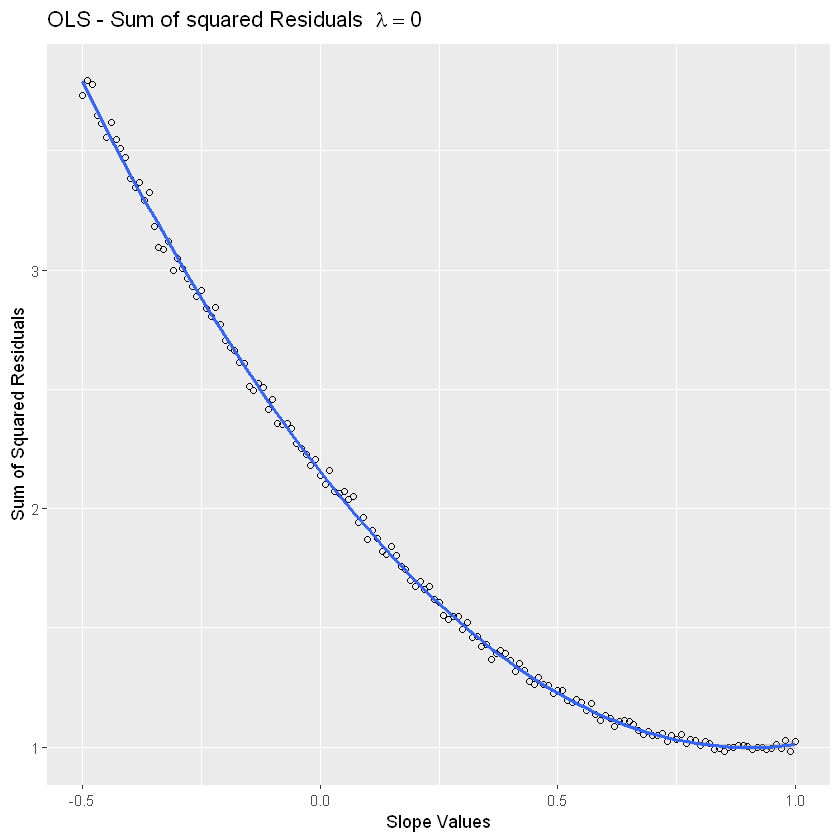

In [7]:
# Visualization for OLS -Sum of squared Residuals, I specifically used a huge data set, to get that smooth curve
visualization_ols(10000)

As slope values ($\beta^{Random}$) increase, the sum of squared residuals gets decreasing up until the point where slope is around $0.9$, which is the true $\beta$. 

**Ridge vs. LASSO**

In [8]:
residuals_lasso = function(sample_size, slope, lambda){
    # Generate the sample data
    data = generate(sample_size = sample_size)
    # Calculating sum of squared residuals + ridge penalty
    lasso = mean((data$Y - as.matrix(data$X) %*% slope)**2) + lambda * abs(slope)         
    return(lasso)
}

In [9]:
residuals_ridge = function(sample_size, slope, lambda){
    # Generate the sample data
    data = generate(sample_size = sample_size)
    # Calculating sum of squared residuals + ridge penalty
    ridge = mean((data$Y - as.matrix(data$X) %*% slope)**2) + lambda * (slope**2)         
    return(ridge)
}

In [14]:
srs = function(sample_size, f){
    # Calculates sum of sqrt residuals for each lambda
    lambda = c(0, 1, 2, 4)
    # Deciding a list of slopes
    slopes = seq(-0.5, 1, by = 0.01)
    # Calculate squared residuals for each one of the slopes
    squared_residuals1 = c()
    squared_residuals2 = c()
    squared_residuals3 = c()
    squared_residuals4 = c()
    for(s in slopes){
        sr1 = f(sample_size, slope = s, lambda = lambda[1])
        sr2 = f(sample_size, slope = s, lambda = lambda[2])
        sr3 = f(sample_size, slope = s, lambda = lambda[3])
        sr4 = f(sample_size, slope = s, lambda = lambda[4])
        squared_residuals1 = append(squared_residuals1, sr1)
        squared_residuals2 = append(squared_residuals2, sr2)
        squared_residuals3 = append(squared_residuals3, sr3)
        squared_residuals4 = append(squared_residuals4, sr4)
    }
    # Gathers sqrt residuals rowwise in a data frame to be used in plot
    vis.data.ridge1 = data.frame(slopes, sr = squared_residuals1)
    vis.data.ridge2 = data.frame(slopes, sr = squared_residuals2)
    vis.data.ridge3 = data.frame(slopes, sr = squared_residuals3)
    vis.data.ridge4 = data.frame(slopes, sr = squared_residuals4)
    data.set = bind_rows(vis.data.ridge1, vis.data.ridge2, vis.data.ridge3, vis.data.ridge4)
    data.set$g = c(rep("lambda = 0", length(slopes)), rep("lambda = 1", length(slopes)),
            rep("lambda = 2", length(slopes)), rep("lambda = 4", length(slopes)))
    colnames(data.set) <- c("Slopes", "sr", "lambdas")
    
    return(data.set)
}

In [17]:
vis.data.lasso = srs(100000, f = residuals_lasso)

In [19]:
#install.packages("tidyverse")
#library(tidyverse)

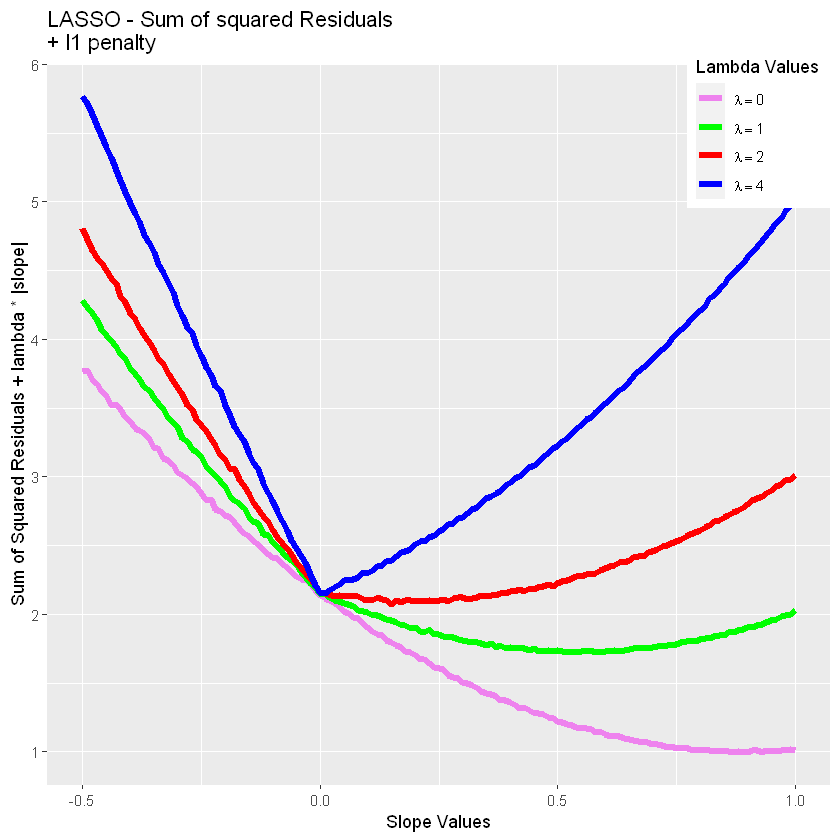

In [21]:
# LASSO 
ggplot(vis.data.lasso, aes(x=Slopes, y=sr, color = lambdas)) + 
geom_line(size = 1.7) + 
labs(x="Slope Values", y="Sum of Squared Residuals + lambda * |slope|", 
       title = "LASSO - Sum of squared Residuals\n+ l1 penalty") +
labs(color = "Lambda Values") +
scale_color_manual(labels = parse(text = c("lambda == 0", "lambda == 1", "lambda == 2", "lambda == 4")),
                   values = c("violet", "green", "red", "blue")) +
theme(legend.justification=c(1,0), legend.position=c(1, 0.80)) 

When $\lambda = 0$, the violet curve is same as the curve for OLS, we showed above. And as $\lambda$ gets increasing, the curve of LASSO gets to have a kink at $0$.

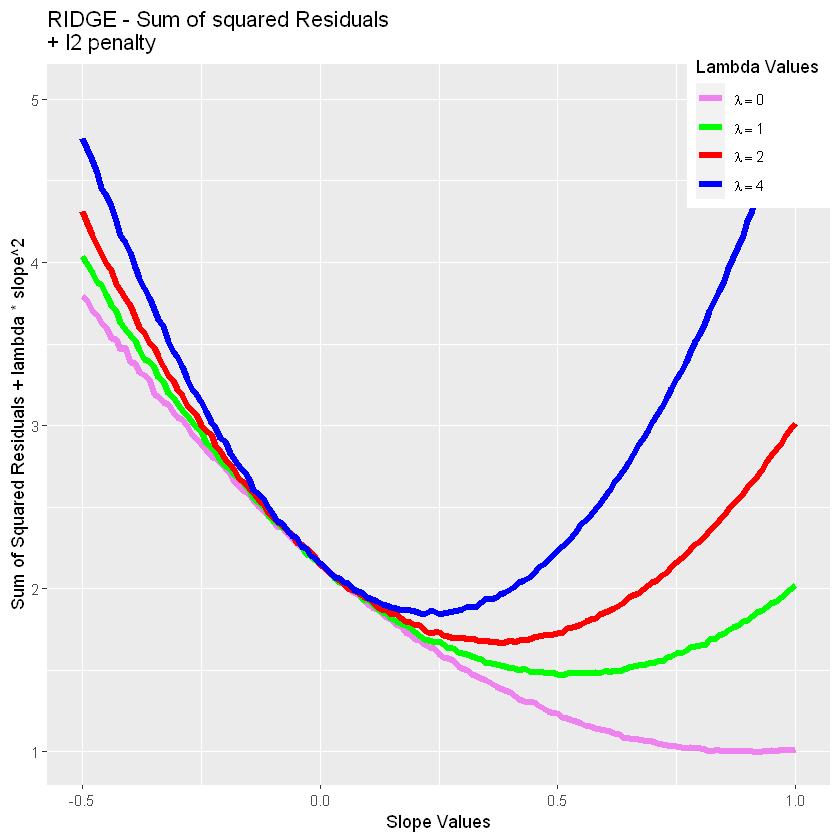

In [22]:
# Ridge
vis.data.ridge = srs(100000, f = residuals_ridge)
ggplot(vis.data.ridge, aes(x=Slopes, y=sr, color = lambdas)) + 
geom_line(size = 1.7) + 
labs(x="Slope Values", y="Sum of Squared Residuals + lambda * slope^2", 
       title = "RIDGE - Sum of squared Residuals\n+ l2 penalty") +
labs(color = "Lambda Values") +
scale_color_manual(labels = parse(text = c("lambda == 0", "lambda == 1", "lambda == 2", "lambda == 4")),
                   values = c("violet", "green", "red", "blue")) +
theme(legend.justification=c(1,0), legend.position=c(1, 0.80)) 

For Ridge, as $\lambda$ increases, the curve gets assymptotically close to zero, but not zero exactly.

---
# 5. Simulation Set-up 3: On average, when estimating the true zero-parameters, which one performs better: Lasso, Ridge or OLS? <a class="anchor" id="zero"></a>
---

**Simulation Set-up**:

The idea for this simulation is taken from (Gauraha, 2018). In addition to OLS and LASSO, I added Ridge regression results. The purpose of this simulation is to see how well LASSO, OLS, and Ridge estimates zero parameters. The true $\beta$ includes some values that are zero. The way I did the simulation, however, is different from (Gauraha, 2018). 

1. Generate n = 100 data points with error vector $\epsilon_{n \times 1} \sim N(0, 1)$, $\quad p = 10, \quad \beta = \{1, 1, 1, 0.03, 0.03, 0.03, 0.05, 0, 0, 0
\}, \quad X \sim N_{p}(0, \Sigma)$ and $Y = X \beta + \epsilon.$ Here $\Sigma$ is a diagonal matrix, with values on the diagonal a sequence of values from between 1 and 2.
2. Do the above step 100 times and gather all training datasets.
3. Generate one test set from the same distributions specified in the step 1.

>**OLS** 

For each $k = 100$ different training sets, I fit OLS. Given the estimated $\beta^{OLS}$, the output vector of testing set is predicted. And expected prediction error is calculated as below:
$$E(Y - \hat{f}(x))^2 = \frac{1}{k} \sum_{m = 1}^{k} (\frac{1}{n} \sum_{i = 1}^{n} (Y_{m, i} - \hat{Y}_{m, i})^2)$$
And I find the mean of number of correctly-detected zero parameters, NCZIP is the abbreviation of Number of Correctly-identified Zero Parameters. From 11th to pth element of true $\beta$ vector contains the zero, p being the number of variables. So if p = 20, then, from 11 to 20th element of true $\beta$ vector is zero. 
$$NCIZP = \frac{1}{k = 100} \sum_{m = 1}^{k}\sum_{i = 11}^{p} (1(\hat{\beta_{i, m}}^{OLS} = 0))$$


 
>**LASSO** 

>**Ridge** 

For LASSO and Ridge, the simulation set-up is as same as it is in OLS, however, here the training sets are fitted by LASSO and Ridge regressions based on a grid of $\lambda$ values, and out of these values, $\lambda^{optimal}$ is chosen and the Expected Prediction Error and NCIZP are calculated based on this $\lambda^{optimal}$.

**OLS**

In [27]:
# Expected Prediction Error OLS
epe.OLS = function(p, sample_size){
    # Creating a training set 
    train_set = gen_datasets(p = p, sample_size = sample_size)
    train_set$X = train_set[, -1]
    beta.ols = solve(t(as.matrix(train_set$X)) %*% as.matrix(train_set$X)) %*% t(as.matrix(train_set$X)) %*% as.matrix(train_set$Y)
    # Sum of errors for OLS
    ols.error = mean((as.matrix(test_setY) - (as.matrix(test_setX) %*% beta.ols))**2)
    # Number of Correct zero parameters
    nzc = sum(beta.ols[11:20] == beta.vec[11:20])
    
    frame = cbind(nzc, ols.error)
    colnames(frame) <- c("Number of correct zero coefficients", "Prediction Error OLS")
    return(frame)
}

In [117]:
library (plyr)
replication.OLS = replicate(100, epe.OLS(p = 20, sample_size = 100), simplify = FALSE)
replication.OLS.df <- ldply(replication.OLS, data.frame)
sim.epe = apply(replication.OLS.df, 2, mean)
simulation.result.OLS = data.frame(sim.epe)
rownames(simulation.result.OLS) = c("Number of Correct Zero Coefficients", "Expected Prediction Error OLS")
colnames(simulation.result.OLS) = c("Simulation Results: OLS")
simulation.result.OLS

,Simulation Results: OLS
Number of Correct Zero Coefficients,0.000000
Expected Prediction Error OLS,1.317757


**Ridge vs. LASSO**

In [7]:
library(glmnet)

In [132]:
epe.REG = function(p, sample_size){
    train_set = gen_datasets(p = p, sample_size = sample_size)
    train_set$X = train_set[, -1]
    grid = seq(0, 1, by = 0.02)
    beta.vec <- c(rep(1, 5), rep(0.03, 5), rep(0, 10))
    ridge.model = glmnet(as.matrix(train_set$X), as.matrix(train_set$Y), alpha = 0, lambda = grid, intercept = FALSE, 
                         standardize = F)
    lasso.model = glmnet(as.matrix(train_set$X), as.matrix(train_set$Y), alpha = 1, lambda = grid, intercept = FALSE, 
                         standardize = F)
    cv.ridge.model = cv.glmnet(as.matrix(train_set$X), as.matrix(train_set$Y), alpha = 0, lambda = grid)
    cv.lasso.model = cv.glmnet(as.matrix(train_set$X), as.matrix(train_set$Y), alpha = 1, lambda = grid)
    best.lambda.ridge = cv.ridge.model$lambda.min
    best.lambda.lasso = cv.lasso.model$lambda.min
    ridge.pred.opt = predict(ridge.model, s = best.lambda.ridge, newx = as.matrix(test_setX))
    lasso.pred.opt = predict(lasso.model, s = best.lambda.lasso, newx = as.matrix(test_setX))
    ridge.coef.opt = predict(ridge.model, type = "coefficients", s = best.lambda.ridge)[1:21, ]
    lasso.coef.opt = predict(lasso.model, type = "coefficients", s = best.lambda.lasso)[1:21, ]
    nzc.ridge = sum(ridge.coef.opt[12:21] == beta.vec[11:20])
    nzc.lasso = sum(lasso.coef.opt[12:21] == beta.vec[11:20])
    pe.ridge = mean((test_setY - ridge.pred.opt)**2)
    pe.lasso = mean((test_setY - lasso.pred.opt)**2)
    frame.REG = cbind(nzc.ridge, pe.ridge, nzc.lasso, pe.lasso)
    colnames(frame.REG) = c("Number of Correct Zero Coefficients Ridge", "Prediction Error Ridge",
                            "Number of Correct Zero Coefficients LASSO", "Prediction Error LASSO") 
    return(frame.REG)
}

In [150]:
simulation.REG = apply(replicate(100, epe.REG(20, 100)), 2, mean)
ridge.sim = data.frame(simulation.REG[1:2])
lasso.sim = data.frame(simulation.REG[3:4])
sim.res.reg = cbind(ridge.sim, lasso.sim)
colnames(sim.res.reg) = c("Simulation Results: Ridge", "Simulation Results: LASSO")
rownames(sim.res.reg) = c("Number of Correct Zero Coefficients", "Expected Prediction Error")
sim.res.reg

,Simulation Results: Ridge,Simulation Results: LASSO
Number of Correct Zero Coefficients,0.000000,5.500000
Expected Prediction Error,1.280872,1.189378


As it is apparent from the results, only LASSO out of the other two linear regression models (namely, OLS and Ridge), can on average, 5.5 out of 10 correctly identifies the zero parameters. Both OLS and Ridge, on the other hand, can't. And compared to the expected prediction error, both Regularization methods beat OLS, LASSO having the least expected prediction error amongst.

---
# 6. Simulation Set-up 4: How differently LASSO and Ridge handles covariates with distinct variances <a class="anchor" id="covariate"></a>
---

**Simulation Set-up:**

The below simulation set-up is assimiliated from a compilation of well-known ridge results in (Wieringen, 2015).

The purpose of this simulation is to see how LASSO in relation to Ridge behaves in the presence of covariates with different variances.

1. Generate $(n = 1000) \times (p = 50)$ dimensional $X$ matrix from a multivariate normal distribution $\mathscr{N}(0_{50}, \Sigma)$, with $\Sigma$ diagonal and $(\Sigma)_{jj} = j / 10 \text{ for } j = 1, \ldots , p.$ The true $\beta$ is a vector of ones, and $\epsilon$ is generated from a standard normal distribution. The output vector is then generated by: $Y = X \beta  + \epsilon$.
2. This linear regression model is fitted by both LASSO and Ridge across a set of different $\lambda$ values.
3. The graph then is drawn to show what happens to the coefficients of these covariates with distinct variances as $\lambda$ increases.

In [20]:
generate_data = function(p, n){
    eps = rnorm(n = n, 0, 1)
    X = rmvnorm(n= n, mean=rep(0, p), sigma=diag(seq(1, p) / 10, nrow = p, ncol = p))
    beta.vec = c(rep(1, p))
    Y = as.matrix(X) %*% beta.vec + eps
    return(data.frame(Y, X))
}

In [21]:
coefs.var.lasso = function(p, n){
    train_set = generate_data(p = p, n = n)
    train_set$X = train_set[, -1]
    grid = seq(0, 9, by = 0.05) 
    lasso.model = glmnet(as.matrix(train_set$X), as.matrix(train_set$Y), alpha = 1, lambda = grid, intercept = FALSE, 
                     standardize = F)
    lasso.coef = data.frame(matrix(nrow = (p + 1), ncol = length(grid)))
    for(g in grid){
      lasso.coef[grid == g] = predict(lasso.model, type = "coefficients", s = g)[1:(p+1), ] 
    }
    colnames(lasso.coef) = sprintf("lambda = %.2f", grid)
    rownames(lasso.coef) = c("Intercept", sprintf("X%.f", seq(1, p)))
    parameters = lasso.coef[-1, ]
    long.format = data.frame(values=matrix(t(parameters)), ind=colnames(parameters))
    #parameters$var = c(rep("[0, 1]", 10), rep("[1, 2]", 10), rep("[2, 3]", 10), rep("[3, 4]", 10), rep("[4, 5]", 10))
    #parameters
    long.format$lambdas = c(rep(grid, 50))
    long.format$variance = c(rep("[0, 1]", 10 * 181), rep("[1, 2]", 10 * 181), rep("[2, 3]", 10 * 181), 
                             rep("[3, 4]", 10 * 181), rep("[4, 5]", 10 * 181))
    return(long.format)

}

In [22]:
coefs.var.ridge = function(p, n){
    train_set = generate_data(p = p, n = n)
    train_set$X = train_set[, -1]
    grid = seq(0, 100, by = 0.05) 
    ridge.model = glmnet(as.matrix(train_set$X), as.matrix(train_set$Y), alpha = 0, lambda = grid, intercept = FALSE, 
                     standardize = F)
    ridge.coef = data.frame(matrix(nrow = (p + 1), ncol = length(grid)))
    for(g in grid){
      ridge.coef[grid == g] = predict(ridge.model, type = "coefficients", s = g)[1:(p+1), ] 
    }
    colnames(ridge.coef) = sprintf("lambda = %.2f", grid)
    rownames(ridge.coef) = c("Intercept", sprintf("X%.f", seq(1, p)))
    parameters = ridge.coef[-1, ]
    long.format = data.frame(values=matrix(t(parameters)), ind=colnames(parameters))
    long.format$lambdas = c(rep(grid, 50))
    long.format$variance = c(rep("[k = 1]", 10 * length(grid)), rep("[k = 2]", 10 * length(grid)), rep("[k = 3]", 10 * length(grid)), 
                             rep("[k = 4]", 10 * length(grid)), rep("[k = 5]", 10 * length(grid)))
    return(long.format)

}

In [23]:
visual.lasso.covariates = coefs.var.lasso(50, 1000)
visual.ridge.covariates = coefs.var.ridge(50, 1000)
grid.l = seq(0, 9, by = 0.05)
grid.r = seq(0, 100, by = 0.05)
visual.lasso.covariates$l = c(rep(seq(1, 50), each = length(grid.l)))
visual.ridge.covariates$l = c(rep(seq(1, 50), each = length(grid.r)))

In [31]:
#library(tidyverse)

**LASSO**

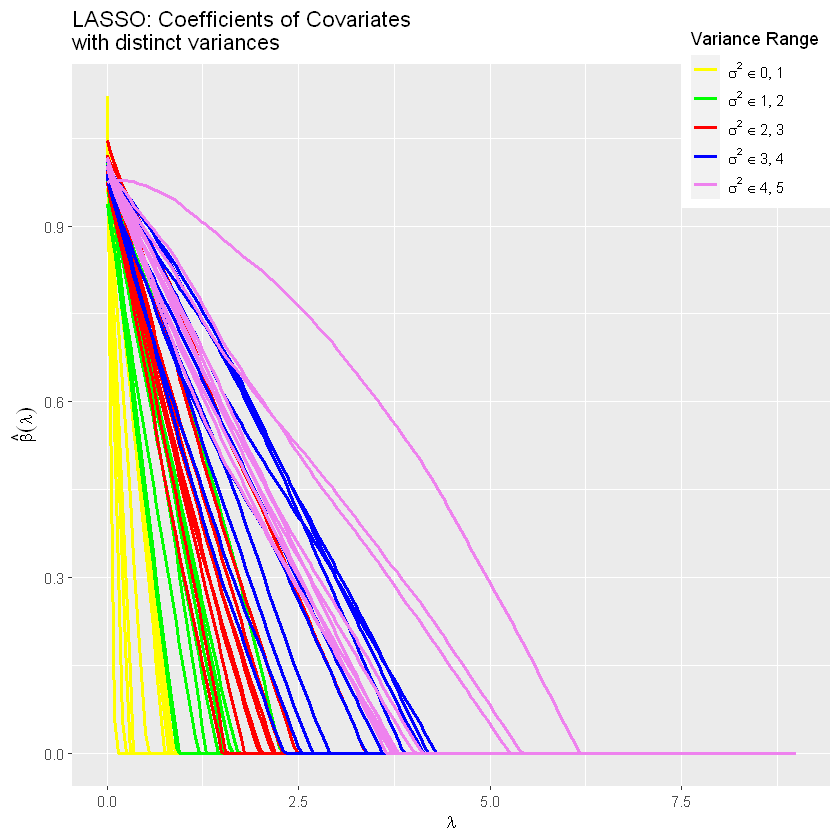

In [28]:
# Solution Paths of Covariates with distinct variances
ggplot(visual.lasso.covariates, aes(x=lambdas, y=values, color = variance, group = as.factor(l))) + 
geom_line(size = 1) + 

labs(x=parse(text = "lambda"), y=parse(text = "hat(beta)(lambda)"), 
       title = "LASSO: Coefficients of Covariates\nwith distinct variances") +
labs(color = "Variance Range") +
scale_color_manual(labels = parse(text = c("sigma^2 %in% list(0, 1)", "sigma^2 %in% list(1, 2)", "sigma^2 %in% list(2, 3)", 
                                           "sigma^2 %in% list(3, 4)", "sigma^2 %in% list(4, 5)")),
                   values = c("yellow", "green", "red", "blue", "violet")) +
theme(legend.justification=c(1,0), legend.position=c(1, 0.80)) 


The solution path of the covariates with distinct variances shows that LASSO shrinks those covariates that have less spread, meaning low variance most. This at the same time implies that LASSO selects those variables that have a larger variance for sufficiently large penalty. 

**Ridge**

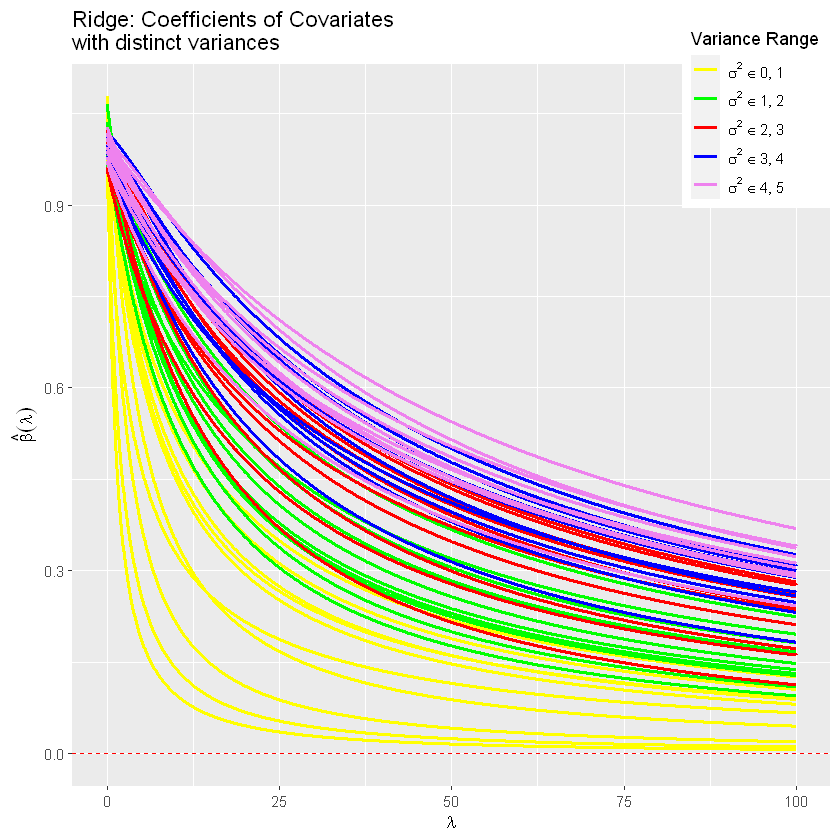

In [30]:
# Solution Paths of Covariates with distinct variances
ggplot(visual.ridge.covariates, aes(x=lambdas, y=values, color = variance, group = as.factor(l))) + 
geom_line(size = 1) + 

labs(x=parse(text = "lambda"), y=parse(text = "hat(beta)(lambda)"), 
       title = "Ridge: Coefficients of Covariates\nwith distinct variances") +
labs(color = "Variance Range") +
scale_color_manual(labels = parse(text = c("sigma^2 %in% list(0, 1)", "sigma^2 %in% list(1, 2)", "sigma^2 %in% list(2, 3)", 
                                           "sigma^2 %in% list(3, 4)", "sigma^2 %in% list(4, 5)")),
                   values = c("yellow", "green", "red", "blue", "violet")) +
theme(legend.justification=c(1,0), legend.position=c(1, 0.80)) +
geom_hline(yintercept = 0, linetype = "dashed", color = "red")


As in LASSO, Ridge also shrinks a lot those variables that have the less spread, and shrinks less those variables that have larger spread, for sufficiently large penalty levels. Unlike in LASSO, here as $\lambda \rightarrow \infty$, all coefficients get close to $0$, however, not eaxctly get set to zero. 

---
# 7. Simulation Set-up 5: And what about correlated covariates? How differently, LASSO and Ridge behaves:
<a class="anchor" id="corr"></a>
---

**Simulation Set-up:**

The below simulation set-up is assimilated from a compilation of well-known ridge results in (Wieringen, 2015).

The purpose of this simulation is to see how LASSO in relation to Ridge behaves in the presence of correlated covariates, with different collinearity level.

1. Generate $(n = 1000) \times (p = 50)$ dimensional $X$ matrix from a multivariate standard normal distribution $\mathscr{N}(0_{50}, \Sigma)$. For each $k$, $k = 1, \ldots, 5$, each $k^{th}$ diagonal block $\Sigma$ comprises $10$ covariates and equals $\frac{k - 1}{5} 1_{10 \times 10} + \frac{6 - k}{5}I_{10 \times 10}$. 
2. $\epsilon$ is generated from standard normal distribution. And true $\beta$ equals a vector of ones so each covariate contributes equally to the output vector $Y$, which is equal to $Y = X\beta + \epsilon$.
3. This linear regression is then fit by both LASSO and Ridge regression estimators across a set of $\lambda$ values.
4. The graph for both LASSO and Ridge is drawn to visualize what happens to the coefficients of these correlated covariates as $\lambda$ increases.

In [8]:
cov_generator = function(k){
    matrix_ones = matrix(1, nrow = 10, ncol = 10)
    matrix_ind = diag(1, nrow = 10, ncol = 10)
    mult1 = (k - 1) / 5
    mult2 = (6 - k) / 5
    cov = mult1 * matrix_ones + mult2 * matrix_ind
    return(cov)
}

In [9]:
data_generator = function(sample_size){
    eps = rnorm(n = sample_size, mean = 0, sd = 1)
    X1 = rmvnorm(n = sample_size, mean = rep(0, 10), sigma = cov_generator(1))
    X2 = rmvnorm(n = sample_size, mean = rep(0, 10), sigma = cov_generator(2))
    X3 = rmvnorm(n = sample_size, mean = rep(0, 10), sigma = cov_generator(3))
    X4 = rmvnorm(n = sample_size, mean = rep(0, 10), sigma = cov_generator(4))
    X5 = rmvnorm(n = sample_size, mean = rep(0, 10), sigma = cov_generator(5))
    X = data.frame(X1, X2, X3, X4, X5)
    colnames(X) = sprintf("X%.f", seq(1, 50))
    beta.vec = c(rep(1, 50))
    Y = as.matrix(X) %*% beta.vec + eps
    return(data.frame(Y, X))
}

In [10]:
coefs.grid.collinear.lasso = function(sample_size){
    train_set = data_generator(sample_size)
    train_set$X = train_set[, -1]
    grid = seq(0, 9, by = 0.05) 
    lasso.model = glmnet(as.matrix(train_set$X), as.matrix(train_set$Y), alpha = 1, lambda = grid, intercept = FALSE, 
                     standardize = F)
    lasso.coef = data.frame(matrix(nrow = 51, ncol = length(grid)))
    for(g in grid){
      lasso.coef[grid == g] = predict(lasso.model, type = "coefficients", s = g)[1:51, ] 
    }
    colnames(lasso.coef) = sprintf("lambda = %.2f", grid)
    rownames(lasso.coef) = c("Intercept", sprintf("X%.f", seq(1, 50)))
    parameters = lasso.coef[-1, ]
    long.format = data.frame(values=matrix(t(parameters)), ind=colnames(parameters))
    long.format$group = c(rep(seq(1, 50), each = 181))
    long.format$color = c(rep("[k = 1]", 10 * 181), rep("[k = 2]", 10 * 181), rep("[k = 3]", 10 * 181), 
                             rep("[k = 4]", 10 * 181), rep("[k = 5]", 10 * 181))
    long.format$lambdas = c(rep(grid, 50))
    return(long.format)
}

In [11]:
coefs.grid.collinear.ridge = function(sample_size){
    train_set = data_generator(sample_size)
    train_set$X = train_set[, -1]
    grid = seq(0, 1000, by = 1) 
    ridge.model = glmnet(as.matrix(train_set$X), as.matrix(train_set$Y), alpha = 0, lambda = grid, intercept = FALSE, 
                     standardize = F)
    ridge.coef = data.frame(matrix(nrow = 51, ncol = length(grid)))
    for(g in grid){
      ridge.coef[grid == g] = predict(ridge.model, type = "coefficients", s = g)[1:51, ] 
    }
    colnames(ridge.coef) = sprintf("lambda = %.2f", grid)
    rownames(ridge.coef) = c("Intercept", sprintf("X%.f", seq(1, 50)))
    parameters = ridge.coef[-1, ]
    long.format = data.frame(values=matrix(t(parameters)), ind=colnames(parameters))
    long.format$group = c(rep(seq(1, 50), each = length(grid)))
    long.format$color = c(rep("[k = 1]", 10 * length(grid)), rep("[k = 2]", 10 * length(grid)), rep("[k = 3]", 10 * length(grid)), 
                             rep("[k = 4]", 10 * length(grid)), rep("[k = 5]", 10 * length(grid)))
    long.format$lambdas = c(rep(grid, 50))
    return(long.format)
}

In [12]:
visual.lasso.collinear.covs = coefs.grid.collinear.lasso(1000)
visual.ridge.collinear.covs = coefs.grid.collinear.ridge(1000)

**LASSO**

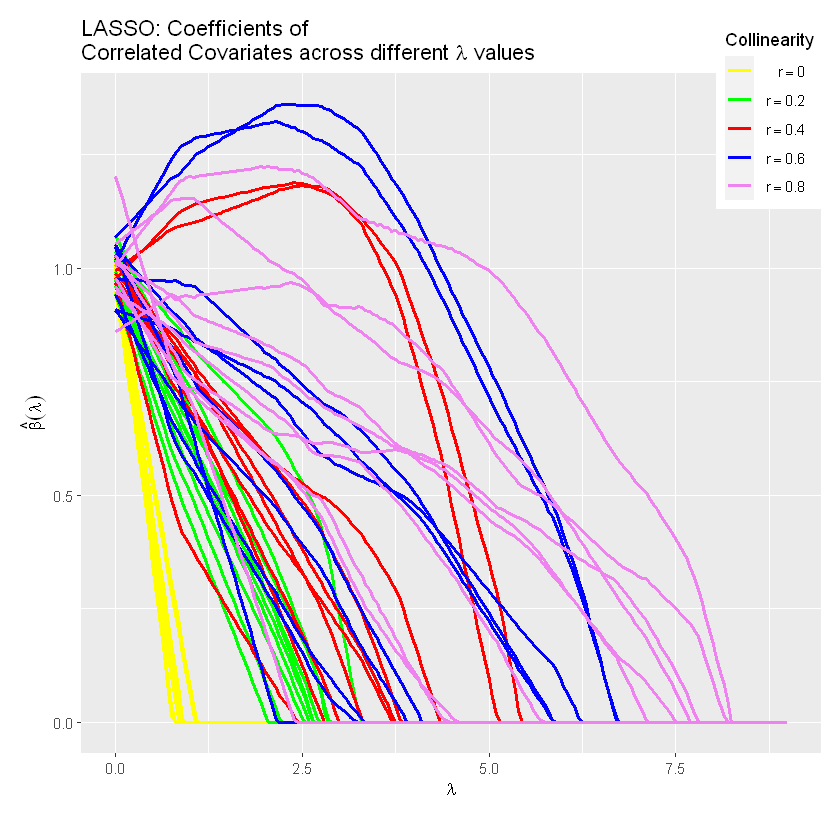

In [15]:
ggplot(visual.lasso.collinear.covs, aes(x=lambdas, y=values, color = color, group = as.factor(group))) + 
geom_line(size = 1) + 
labs(x=parse(text = "lambda"), y=parse(text = "hat(beta)(lambda)")) +
ggtitle(expression(paste("LASSO: Coefficients of \nCorrelated Covariates across different ", lambda, " values"))) +
labs(color = "Collinearity") +
scale_color_manual(labels = parse(text = c("r == 0.0", "r == 0.2", "r == 0.4", "r == 0.6", "r == 0.8")),
                   values = c("yellow", "green", "red", "blue", "violet")) +
theme(legend.justification=c(1,0), legend.position=c(1, 0.80)) +
coord_cartesian(xlim = c(0, 9), ) +
theme(plot.margin = margin(0.9, 0.39, 0.9, 0.39, "cm"))

Apparent from the graph, as $\lambda$ increases, instead of shrinking all the collinear covariates in the same $\Sigma_{k}$ block, LASSO selects one covariate and kicks other 9 covariates out, by setting their parameters to zero. And as the collinearity between the covariates in different $\Sigma_{k}$ blocks increase (In the graph, $r = 0.0, \ldots, 0.8$ refers to the non-diagonal values in each $\Sigma_{k}$), $\lambda$ needs increase much more for the LASSO to choose one covariate, and force the rest 9 covariates out in that $\Sigma_{k}$ block. 

**Ridge**

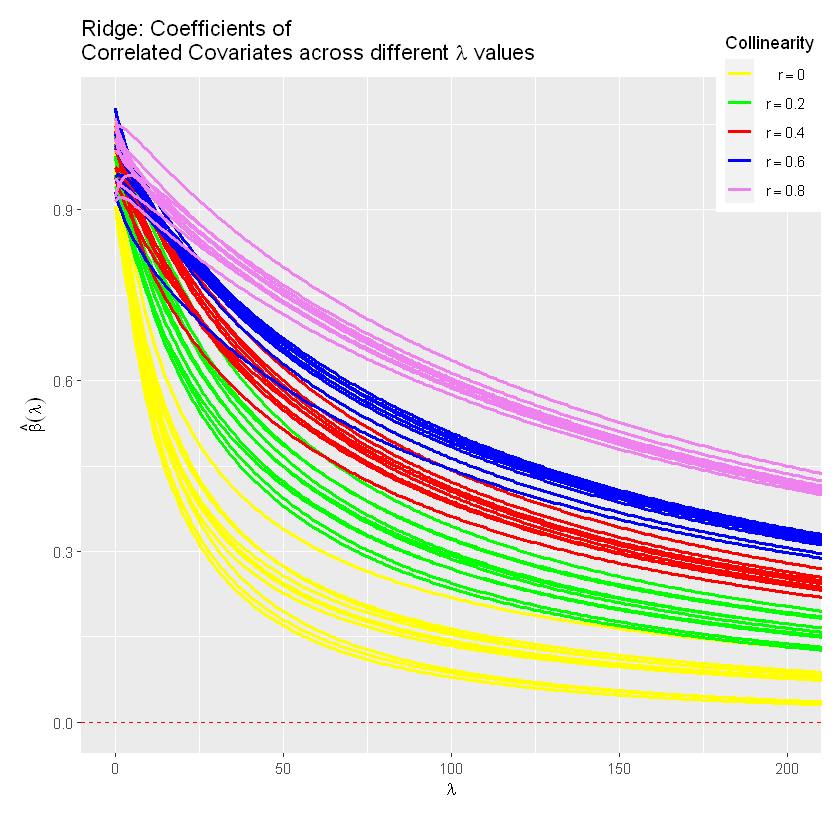

In [19]:
ggplot(visual.ridge.collinear.covs, aes(x=lambdas, y=values, color = color, group = as.factor(group))) + 
geom_line(size = 1) + 
labs(x=parse(text = "lambda"), y=parse(text = "hat(beta)(lambda)"), 
       title = expression(paste("Ridge: Coefficients of \nCorrelated Covariates across different ", lambda, " values"))) +
labs(color = "Collinearity") +
scale_color_manual(labels = parse(text = c("r == 0.0", "r == 0.2", "r == 0.4", 
                                           "r == 0.6", "r == 0.8")),
                   values = c("yellow", "green", "red", "blue", "violet")) +
theme(legend.justification=c(1,0), legend.position=c(1, 0.80)) +
coord_cartesian(xlim = c(0, 200)) +
theme(plot.margin = margin(0.9, 0.39, 0.9, 0.39, "cm")) +
geom_hline(yintercept = 0, linetype = "dashed", color = "red")

And for the Ridge, the correlated covariates in the same $\Sigma_{k}$ block get grouped together, and as $\lambda \rightarrow \infty$, all of the covariates converge to zero. But also, Ridge has a preference for the covariates with higher positive correlation value, as it shrinks them less, compared to other covariates with less large off-diagonal values. 

---
# 8. Conclusion
<a class="anchor" id="conclusion"></a>
---

In settings where LASSO is used as a variable selection, or instrumental variable selection method, knowledge of how LASSO selects such covariates if there are differential variances or some of such covariates are correlated with one another is important. 
 
In this project paper, I tried to go deep into the properties of LASSO, with the help of simulatory set-ups. "*Which one-LASSO, Ridge, or OLS-is better in estimating true zero parameters correctly? When $\lambda$ increases, to minimize the sum of squared residuals plus the penalty term, how LASSO and Ridge behaves around zero?*" as such are answered. The importance of these questions is manifold. When in real data-set, one deals with huge covariates list, getting rid of the unimportant ones is a good simplification. The purpose of this paper was not to show how LASSO outdo the other linear regression methods, but rather shed specific light on how LASSO handles the parameter estimation in settings specified in various simulations used throughout this paper. 


---
# 9. References
<a class="anchor" id="references"></a>
---

1. Gauraha, N. (2018). Introduction to the LASSO. *Reson, 23*, 439–464. 

2. Wieringen, W.N. (2015). Lecture notes on ridge regression. arXiv: Methodology.

3. Gareth James, Daniela Witten, Trevor Hastie, Robert Tibshirani. (2013). An introduction to statistical learning: with applications in R. New York: Springer.

4. Belloni, Alexandre, Victor Chernozhukov, and Christian Hansen. (2014). "High-Dimensional Methods and Inference on Structural and Treatment Effects." *Journal of Economic Perspectives, 28 (2):* 29-50.

---
Notebook by Sona Verdiyeva | Find me on github at https://github.com/s6soverd

---
 